# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [12]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha_values = [0.1, 0.5, 1.0] 

results = {}
for a in alpha_values:
    w = np.linalg.inv(x.T*x + a * I) * x.T*y
    w = w.ravel()
    results[a] = w

print("Results for different alpha values:")
for a, w in results.items():
    print("Alpha:", a, "Weights:", w)

Results for different alpha values:
Alpha: 0.1 Weights: [[-101.72397081    1.16978757]]
Alpha: 0.5 Weights: [[-36.97522016   0.80324169]]
Alpha: 1.0 Weights: [[-20.59044706   0.71048616]]


## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [13]:
def sgd(x, y, alpha=0.1, learning_rate=0.01, epochs=10, batch_size=1):
    n_samples, n_features = x.shape
    w = np.matrix(np.zeros((n_features, 1)))
    
    weights_history = []
    
    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        
        for i in range(0, n_samples, batch_size):
            if i + batch_size > n_samples:
                batch_x = x_shuffled[i:n_samples]
                batch_y = y_shuffled[i:n_samples]
            else:
                batch_x = x_shuffled[i:i+batch_size]
                batch_y = y_shuffled[i:i+batch_size]
            
            pred = batch_x * w
            error = pred - batch_y
            gradient = batch_x.T * error / batch_size
            
            w = w - learning_rate * gradient
            
            for j in range(n_features):
                if w[j, 0] > alpha * learning_rate:
                    w[j, 0] -= alpha * learning_rate
                elif w[j, 0] < -alpha * learning_rate:
                    w[j, 0] += alpha * learning_rate
                else:
                    w[j, 0] = 0
        
        weights_history.append(w.copy())
        
    return w, weights_history

In [14]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 

w, weights_history = sgd(x, y, alpha=alpha, learning_rate=0.00001, epochs=10)
print("Lasso regression weights using SGD:", w.ravel())

ridge_w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
print("Ridge regression weights:", ridge_w.ravel())

Lasso regression weights using SGD: [[0.0007415  0.59049814]]
Ridge regression weights: [[-101.72397081    1.16978757]]


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

Accuracy: 0.80


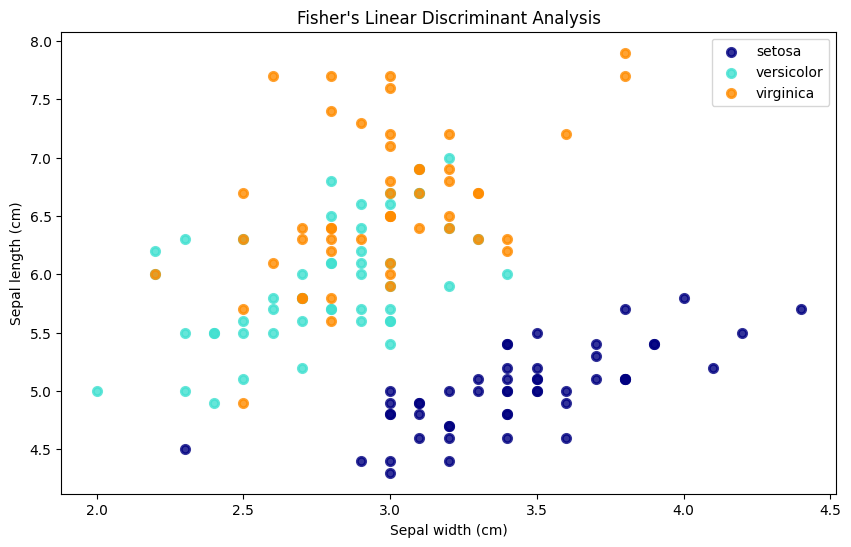

In [15]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values
y = iris_data.target

lda = LinearDiscriminantAnalysis()
lda.fit(x, y)
y_pred = lda.predict(x)

accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(10, 6))
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris_data.target_names

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
    
plt.xlabel('Sepal width (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend(loc='best')
plt.title("Fisher's Linear Discriminant Analysis")
plt.show()